# Replication of Table 2

In [1]:
import numpy as np
from src.experiments import DARNN_Table2
from src.utils import set_seed

## DARNN (128)

In [2]:
epochs = 50
load_model = True

seq_len = 3
hidden_dim_encoder = 128
hidden_dim_decoder = 128
batch_size = 32
seeds = [1, 2, 3, 4, 5]

rmse_lst = []
mae_lst = []
mape_lst = []
for seed in seeds:
    set_seed(seed)
    rmse, mae, mape = DARNN_Table2(seq_len=seq_len, 
                                    hidden_dim_encoder=hidden_dim_encoder, 
                                    hidden_dim_decoder=hidden_dim_decoder,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    seed=seed,
                                    load_model=load_model)
    rmse_lst.append(rmse)
    mae_lst.append(mae)
    mape_lst.append(mape*10000)
    
print(f"RMSE: {np.mean(rmse_lst):0.4f} +/- {np.std(rmse_lst):0.4f}")
print(f"MAE: {np.mean(mae_lst):0.4f} +/- {np.std(mae_lst):0.4f}")
print(f"MAPE: {np.mean(mape_lst):0.4f}10^-2% +/- {np.std(mape_lst):0.4f}")

RMSE: 0.4110 +/- 0.0310
MAE: 0.2861 +/- 0.0182
MAPE: 0.579210^-2% +/- 0.0369


## DARNN (64)

In [3]:
epochs = 50
load_model = True

seq_len = 3
hidden_dim_encoder = 64
hidden_dim_decoder = 64
batch_size = 32
seeds = [1, 2, 3, 4, 5]

rmse_lst = []
mae_lst = []
mape_lst = []
for seed in seeds:
    set_seed(seed)
    rmse, mae, mape = DARNN_Table2(seq_len=seq_len, 
                                    hidden_dim_encoder=hidden_dim_encoder, 
                                    hidden_dim_decoder=hidden_dim_decoder,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    seed=seed,
                                    load_model=load_model)
    rmse_lst.append(rmse)
    mae_lst.append(mae)
    mape_lst.append(mape*10000)
    
print(f"RMSE: {np.mean(rmse_lst):0.4f} +/- {np.std(rmse_lst):0.4f}")
print(f"MAE: {np.mean(mae_lst):0.4f} +/- {np.std(mae_lst):0.4f}")
print(f"MAPE: {np.mean(mape_lst):0.4f}10^-2% +/- {np.std(mape_lst):0.4f}")

RMSE: 0.6126 +/- 0.3479
MAE: 0.4863 +/- 0.3367
MAPE: 0.984310^-2% +/- 0.6813


# Replication of Figure 2

In [4]:
import torch
from src.data import NasdaqDataset
from torch.utils.data import DataLoader
from src.models import DARNN


weight_path = f"weights/DARNN_L{seq_len}_HDE{hidden_dim_encoder}_HDD{hidden_dim_decoder}_BS{batch_size}_E{epochs}_s{seed}.pth"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load data
train_dataset = NasdaqDataset(seq_len=seq_len, mode='train', normalize=True)
val_dataset = NasdaqDataset(seq_len=seq_len, mode='val', normalize=True)
test_dataset = NasdaqDataset(seq_len=seq_len, mode='test', normalize=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

stock_num = train_dataset.X.shape[2]
seq_len = train_dataset.X.shape[1]

# define model
model = DARNN(hidden_dim_decoder=hidden_dim_decoder, 
                hidden_dim_encoder=hidden_dim_encoder, 
                stock_num=stock_num, 
                seq_len=seq_len
                ).to(device)
    
model.load_state_dict(torch.load(weight_path))
model.eval()

preds = []
true = []
for batch_x, batch_y, batch_target in test_loader:
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    batch_target = batch_target.to(device)
    output = model(batch_x, batch_y) # (batch, 1)
    preds.append(output.detach().cpu().numpy())
    true.append(batch_target.detach().cpu().numpy())
preds = np.concatenate(preds)
true = np.concatenate(true)

# inverse transform
preds = test_dataset.scaler_target.inverse_transform(preds)
true = test_dataset.scaler_target.inverse_transform(true)


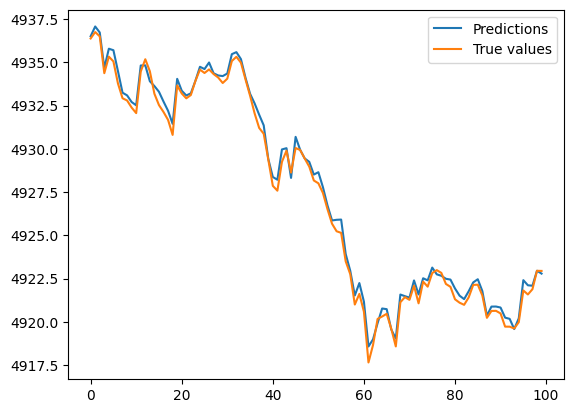

In [5]:
import matplotlib.pyplot as plt
plt.plot(preds[-100:], label="Predictions")
plt.plot(true[-100:], label="True values")
plt.legend()